<a href="https://colab.research.google.com/github/kretchmar/CS339_2023/blob/main/Simple_PCA_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple PCA Example

Matt Kretchmar <p>
February 2023 <p>

In this notebook we apply the classic PCA algorithm to a trivial data set consisting of 3 points embedded in 2D space.   The goal is to map the samples into a lower dimensional space (ie a 1D space).  We follow the example and mathematics laid out in the class textbook *Geometric Data Analysis* by Mike Kirby.  

The PCA algorithm computes the eigen values of the covariance matrix and uses these to form a new basis for casting images.  We can show the data can be captured well with a 1D linear surface by doing an orthogonal projection.  The projection is computed using the eigenvectors of the covariance matrix. 



In [64]:
# Import Statements
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from scipy import linalg as la


#### Data

The data consists of $n = 3$ data points each of which is a vector in $d=2$ dimensional space.  We can think of the data as a 3x2 matrix:

$$
X = \left| \begin{array}{ccc} - & x^1 & - \\ - & x^2 & - \\ - & x^3 & - \\   \end{array} \right|  \\ 
\ \\
X = \left| \begin{array}{cccc} [ & x^1_1 & x^1_2 & ]  \\ 
[ & x^2_1 & x^2_2 & ]  \\
[ & x^3_1 & x^3_2 & ]    \end{array} \right| \\
$$

where each row is a 2x1 vector for one point in the sample.  

(3, 2)
[[ 6.7  4. ]
 [ 4.6  1.7]
 [-4.1 -1.3]]


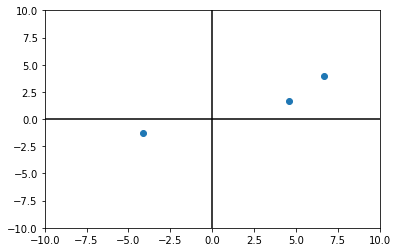

In [65]:
# Create a very simple dataset
X = np.array([[6.7, 4.0],[4.6,1.7],[-4.1,-1.3]])
print(X.shape)
print(X)

plt.scatter(X[:,0],X[:,1])
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.plot([-10,10],[0,0],c='k')
plt.plot([0,0],[-10,10],c='k')
plt.show()

## Preparations
It is typical to mean-center the dataset.  This is done by computing the mean of the samples and then subtracting the mean from each point.  Each remaining point is now called the *charicature* because it is the residual of what is left to make that point "different" from the average.  

We now call our data $X_c$ to refer to it as the centered data.  

[2.4        1.46666667]
[[ 4.3         2.53333333]
 [ 2.2         0.23333333]
 [-6.5        -2.76666667]]


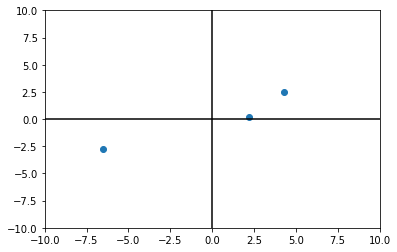

In [66]:
meanX = X.mean(axis=0)
print(meanX)
Xc = (X - meanX)
print(Xc)

plt.scatter(Xc[:,0],Xc[:,1])
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.plot([-10,10],[0,0],c='k')
plt.plot([0,0],[-10,10],c='k')
plt.show()



## PCA Computations


Typically we either have that $n >> d$ or that $d >> n$.   Deciding which case we have is important for the functionality of the algorithm.   We want to know the dimension of the sub-hyperplane in which the data lies.  This is the smaller of $d$ or $n$.  This dimension of the hyperplane is exactly the number of eigenvalues and eigenvectors we will get from the problem.  

#### n > d
In the case where $n$ > $d$, we will compute the eigenvalues from the regular $d \times d$ covariance matrix $C$:   

$$
C = X^T \cdot X
$$




In [67]:
# C = the covariance matrix
C = np.dot(Xc.transpose(),Xc)
print("shape of C =",C.shape)
print(C)


shape of C = (2, 2)
[[65.58       29.39      ]
 [29.39       14.12666667]]


### Eigenvector Deomposition
We now compute the eigenvectors of the covariance matrix.   We will interpret the eigenvectors as a matrix of column vectors where each column is one of the eigenvectors.  We will re-order the vectors by order of decreasing eigenvalue so that the "most important" eigenvectors come first. 

$$
V = \left| \begin{array}{cc} | & | \\ v^1 & v^2 \\ | & | \end{array} \right|
$$

The eigenvalues give us an idea of the amount of variance in the data in each direction of the eigenvector.   Below we see that the first eigenvalue is about 100 times larger than the second eigenvalue so we conclude that about 99% of the variance will be captured by the direction of the first eigenvector while the remaining eigenvector will capture only 1% of the variance. 

Shape of eigenvectors:  (2, 2)
EigenVectors
[[ 0.91067438  0.4131249 ]
 [-0.4131249   0.91067438]]
First  Eval: 78.9126917225565
Second Eval: 0.7939749441101718


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


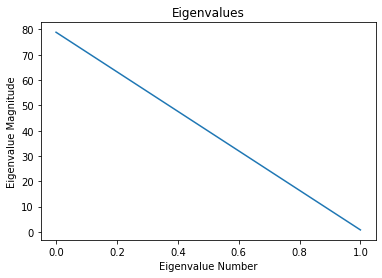

complex128
Percent/Accum Percent for Eigval [  0]:  0.99   0.99
Percent/Accum Percent for Eigval [  1]:  0.01   1.00


In [68]:
# computes the eigenvectors as COLUMN vectors
evals,V = la.eig(C)
#print('EigenValues:',evals)
print('Shape of eigenvectors: ',V.shape)

V = V.transpose()



# sort indices of eigenvectors by reverse order of eigenvalues (biggest down to smallest)
indices = np.argsort(evals)
indices = indices[::-1]
# re-order the eigenvalues and eigenvalues
V = V[indices]
evals = evals[indices]

print("EigenVectors")
print(V)

print('First  Eval:',np.absolute(evals[0]))
print('Second Eval:',np.absolute(evals[1]))

plt.figure()
plt.plot(evals)
plt.title('Eigenvalues')
plt.xlabel('Eigenvalue Number')
plt.ylabel('Eigenvalue Magnitude')
plt.show()

print(evals[0].dtype)
total = 0
for i in range(len(evals)):
  total += np.absolute(evals[i])

accum = 0
for i in range(2):
  percent = np.absolute(evals[i]) / total
  accum += percent
  print("Percent/Accum Percent for Eigval [{0:3d}]: {1:5.2f}  {2:5.2f}".format(i,percent,accum))



In [69]:
# Sandbox Calculations for Computing Test Values
# (not needed for notebook functionality)
print(V[0,:])
print(np.dot(V[0,:],V[0,:].transpose()))
print(Xcenter[0,:])
alpha1 = np.dot(V[0,:],Xcenter[0,:].transpose())
print('alpha1:',alpha1)
alpha2 = np.dot(V[1,:],Xcenter[0,:].transpose())
print('alpha2:',alpha2)
x1r = alpha1 * V[0,:] + alpha2 * V[1,:]
print('x1r:',x1r)
print('V:',V)
print('Vinv:',np.linalg.pinv(V))



[0.91067438 0.4131249 ]
0.9999999999999999
[4.3        2.53333333]
alpha1: 4.9624828900009526
alpha2: 0.5306046967616942
x1r: [4.3        2.53333333]
V: [[ 0.91067438  0.4131249 ]
 [-0.4131249   0.91067438]]
Vinv: [[ 0.91067438 -0.4131249 ]
 [ 0.4131249   0.91067438]]


## Eigenvalue Interpretation

Below we see the original basis given by the traditional $x = \left| \begin{array}{c} 1 \\ 0 \end{array} \right|$ and $y = \left| \begin{array}{c} 0 \\ 1 \end{array} \right|$ vectors.  This is called the standard normal basis.  

The red line is our first eigenvector and the green line is the second eigenvector, which is orthogonal to the first.  They form a new basis to express the data.  Notice the first eigenvector (red) nearly captures the entire dataset (it almost entirely lies on this line).   



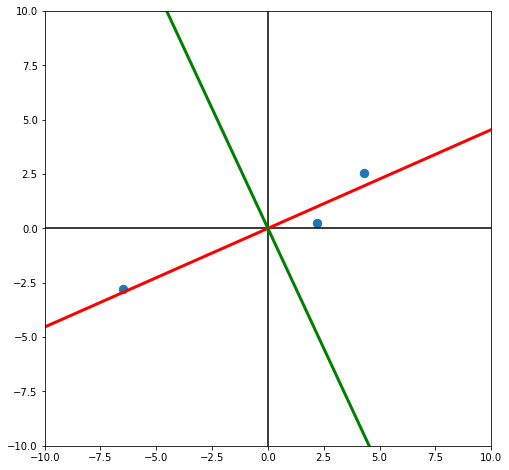

In [70]:
plt.figure(figsize=(8,8))
plt.scatter(Xc[:,0],Xc[:,1],s=70)
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.plot([-10,10],[0,0],c='k')
plt.plot([0,0],[-10,10],c='k')

P1x = 10
P1y = (P1x / V[0,0]) * V[0,1]
P2x = -10
P2y = P2x / V[0,0] * V[0,1]
plt.plot([P1x,P2x],[P1y,P2y],c='red',linewidth=3)

P1y = 10
P1x = P1y / V[1,1] * V[1,0]
P2y = -10
P2x = P2y / V[1,1] * V[1,0]
plt.plot([P1x,P2x],[P1y,P2y],c='green',linewidth=3)

plt.show()

Now we want to compute the coefficients of the data in the new basis.   Consider our original centered data from $X_c$.  Our first centered point is

$$
x_c^1 = \left| \begin{array}{ c c } 2.4 &  1.47 \end{array} \right|
$$

We can express this as a series of coefficients multiplied by basis vectors:

$$
x_c^1 = x_1^1 \cdot u_1 + x_2^1 \cdot u_2 = 2.4 \left| \begin{array}{c} 1 \\ 0 \end{array} \right| + 1.47 \left| \begin{array}{c} 0 \\ 1 \end{array} \right|
$$
where $u_1$ and $u_2$ is the standard normal basis.


Alternatively, we can express $x^1$ using the basis spanned by the two eigenvectors:

$$
x_c^1 = \alpha_1^1 \cdot v_1 + \alpha_2^1 \cdot v_2 
$$
where the coefficients are different and now expressed by $\alpha$.  We can expand on this using matrix notation:

$$
X = \alpha V\\
\ \\
X_{3 \times 2} = \alpha_{3 \times 2} V_{2 \times 2} \\
\ \\
X = \left| \begin{array}{cccc} [ & x^1_1 & x^1_2 & ]  \\ 
[ & x^2_1 & x^2_2 & ]  \\
[ & x^3_1 & x^3_2 & ]    \end{array} \right| = \left| \begin{array}{cccc} [ & \alpha^1_1 & \alpha^1_2 & ]  \\ 
[ & \alpha^2_1 & \alpha^2_2 & ]  \\
[ & \alpha^3_1 & \alpha^3_2 & ]    \end{array} \right|  \cdot 
\left| \begin{array}{cc} | & | \\ v^1 & v^2 \\ | & | \end{array} \right|
$$


To compute $\alpha$ we solve the inverse equation:

$$
X = \alpha V\\
\ \\
X V^{-1} = \alpha V V^{-1}\\
\ \\
\alpha = X V^{-1} 
$$




In [71]:
# We now compute the coefficients for each original image as coordinates that span the eigenspace.  
#V = evecs.transpose()
alpha = np.dot(Xc,np.linalg.pinv(V))
print(alpha.shape)
# each row is a set of coordinates for an image
print(alpha)


(3, 2)
[[ 4.96248289  0.5306047 ]
 [ 2.09987944 -0.69638409]
 [-7.06236233  0.16577939]]


## Reconstruction Example
 Let us fully reconstruct the data set using all eigenvectors:

$$
X_r = \alpha V\\
$$


In [72]:
Xr = np.dot(alpha,V)
print('X reconstructed')
print(Xr)
print('X centered (original)')
print(Xc) 

X reconstructed
[[ 4.3         2.53333333]
 [ 2.2         0.23333333]
 [-6.5        -2.76666667]]
X centered (original)
[[ 4.3         2.53333333]
 [ 2.2         0.23333333]
 [-6.5        -2.76666667]]


## Partial Reconstruction
The above is the full, 2-term reconstruction of the data.   It is an exact reproduction of the original mean centered data.  There will be 0 error between this reconstructed and the original.  

But we can also opt to perform a partial reconstruction.  We can use the first eigenvector only to do a partial reconstruction.  The partial reconstruction will be an approximation to the original. Because 99% of the variance is captured by the direction of the first eigenvector, the difference between the original and reconstructed data won't be terribly large, but there will be an error.  

We call the partial reconstruction $X_p$:

$$
X_p = \alpha_1 \cdot v^1
$$

In [73]:
k = 1

Xp = np.dot(alpha[:,:k],V[:k,:])
print('X partial reconstruction\n',Xp)
print('X centered (original)\n',Xc)

X partial reconstruction
 [[ 4.51920601  2.05012523]
 [ 1.9123064   0.86751248]
 [-6.43151241 -2.91763771]]
X centered (original)
 [[ 4.3         2.53333333]
 [ 2.2         0.23333333]
 [-6.5        -2.76666667]]


### Visualizing Partial Reconstruction
In the graph below, we can see the (orange) points as the partial reconstruction.  Notice they all appear on the vector spanned by the first eigenvector.  This makes sense because each point is expressed as a coefficient times the first eigenvector.   

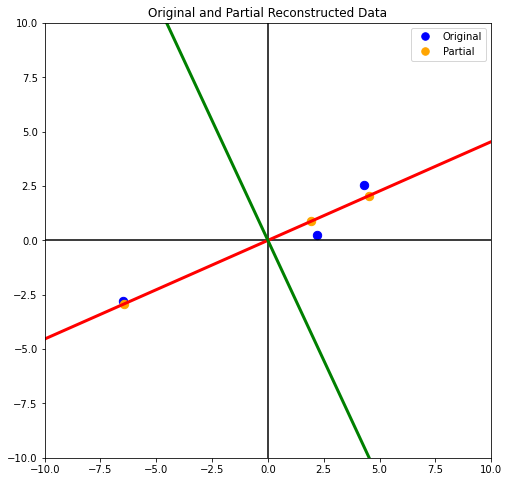

In [74]:
plt.figure(figsize=(8,8))
plt.scatter(Xc[:,0],Xc[:,1],s=70,c='blue')
plt.scatter(Xp[:,0],Xp[:,1],s=70,c='orange')
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.plot([-10,10],[0,0],c='k')
plt.plot([0,0],[-10,10],c='k')

P1x = 10
P1y = (P1x / V[0,0]) * V[0,1]
P2x = -10
P2y = P2x / V[0,0] * V[0,1]
plt.plot([P1x,P2x],[P1y,P2y],c='red',linewidth=3)

P1y = 10
P1x = P1y / V[1,1] * V[1,0]
P2y = -10
P2x = P2y / V[1,1] * V[1,0]
plt.plot([P1x,P2x],[P1y,P2y],c='green',linewidth=3)

plt.title('Original and Partial Reconstructed Data')

import matplotlib.lines as mlines
blue_dot = mlines.Line2D([],[],color='blue',marker='.',markersize=15,linestyle='None',label='Original')
orange_dot = mlines.Line2D([],[],color='orange',marker='.',markersize=15,linestyle='None',label='Partial')
plt.legend(handles=[blue_dot,orange_dot])


plt.show()

## Summary

The eignenvectors form a new basis for expressing our data.  The basis is customized to this particular dataset using the covariance matrix from the data.  The first eigenvector captures the most variance in the data.  The second eigenvector is orthogonal to the first and captures the remaining variance in the data.    

If we desired a lower dimensional version of the data, we can use the partial reconstruction.  This can be useful for three main reasons:

1. Compression: the partial reconstruction may use less memory (or require less bandwidth).  
2. Visualization: the partial reconstruction may be in 2 dimensions whereas the original data was expressed in a much higher dimesional space  $(d >> 2)$.  Thus we can project the original data down to a 2D space so that we can visualize it in a plot.  This particular projection optimally captures the most variance in the data of any 2D projection.  
3. Learning Speed: Some algorithms may learn much faster and with fewer samples if the data is first projected into a much lower space.  